In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup as bsoup

import constants

In [2]:
test_run = True

ukbb_data_file = "small_ukbiobank.csv" if test_run else "ukbiobank.csv"
ukbb_data_path = os.path.join(constants.UK_BIOBANK_DATA_PATH, ukbb_data_file)

ukbb_index_html_path = os.path.join(constants.UK_BIOBANK_DATA_PATH, "ukbiobank.html")
ukbb_index_csv_path = os.path.join(constants.UK_BIOBANK_DATA_PATH, "ukbiobank_index.csv")

In [3]:
if os.path.exists(ukbb_index_csv_path):
    ukbb_index = pd.read_csv(ukbb_index_csv_path)
else:
    ukbb_html = bsoup(open(ukbb_index_html_path,'r').read())
    ukbb_index_html = ukbb_html.find_all("table")[1]
    ukbb_index = pd.read_html(str(ukbb_index_html))[0]
    ukbb_index.columns = [col.lower() for col in ukbb_index.columns]
    ukbb_index.to_csv(ukbb_index_csv_path, index=False)

In [4]:
ukbb_index.head()

,column,udi,count,type,description
0,0,eid,502543,Sequence,Encoded anonymised participant ID
1,1,23-0.0,456606,Categorical (single),Spirometry methodUses data-coding 100270 compr...
2,2,23-1.0,18135,Categorical (single),Spirometry methodUses data-coding 100270 compr...
3,3,23-2.0,26790,Categorical (single),Spirometry methodUses data-coding 100270 compr...
4,4,31-0.0,502543,Categorical (single),SexUses data-coding 9 comprises 2 Integer-valu...


In [5]:
ukbb_data = pd.read_csv(ukbb_data_path, low_memory=False)
ukbb_data.head()

,eid,23-0.0,23-1.0,23-2.0,31-0.0,34-0.0,35-0.0,35-1.0,35-2.0,36-0.0,...,41240-0.0,41241-0.0,41247-0.0,41247-0.1,41247-0.2,41247-0.3,41247-0.4,41247-0.5,41247-0.6,41252-0.0
0,1000015,0.0,NaN,NaN,1,1963,1.0,NaN,NaN,157.0,...,2.0,3.0,2000.0,1000.0,NaN,NaN,NaN,NaN,NaN,5.0
1,1000027,0.0,NaN,NaN,0,1956,1.0,NaN,NaN,3157.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1000039,NaN,NaN,NaN,0,1948,1.0,NaN,NaN,1048.0,...,13.0,15.0,2000.0,1000.0,NaN,NaN,NaN,NaN,NaN,19.0
3,1000040,0.0,NaN,NaN,1,1947,1.0,NaN,NaN,1044.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,1000053,0.0,NaN,0.0,0,1962,1.0,NaN,1.0,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,column,udi,count,type,description,counts,frequency
0,0,eid,502543,Sequence,Encoded anonymised participant ID,9999,1.000000
1,1,23-0.0,456606,Categorical (single),Spirometry methodUses data-coding 100270 compr...,9056,0.905691
2,2,23-1.0,18135,Categorical (single),Spirometry methodUses data-coding 100270 compr...,363,0.036304
3,3,23-2.0,26790,Categorical (single),Spirometry methodUses data-coding 100270 compr...,528,0.052805
4,4,31-0.0,502543,Categorical (single),SexUses data-coding 9 comprises 2 Integer-valu...,9999,1.000000
5,5,34-0.0,502543,Integer,Year of birth,9999,1.000000
6,6,35-0.0,501328,Categorical (single),Was blood sampling attemptedUses data-coding 7...,9978,0.997900
7,7,35-1.0,20337,Categorical (single),Was blood sampling attemptedUses data-coding 7...,412,0.041204
8,8,35-2.0,29389,Categorical (single),Was blood sampling attemptedUses data-coding 7...,575,0.057506
9,9,36-0.0,497907,Text,Blood pressure device ID,9907,0.990799


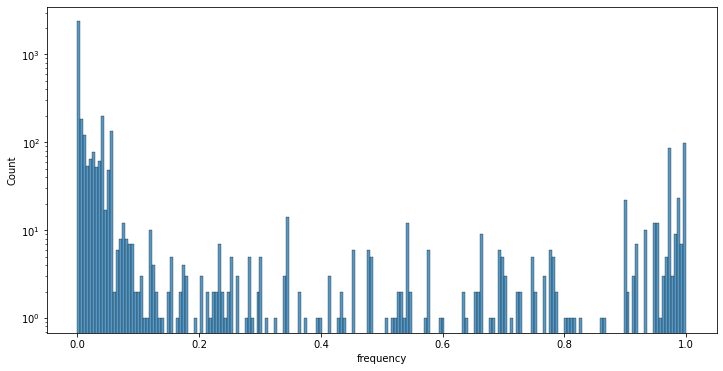

,column,udi,count,type,description,counts,frequency
0,0,eid,502543,Sequence,Encoded anonymised participant ID,9999,1.000000
4,4,31-0.0,502543,Categorical (single),SexUses data-coding 9 comprises 2 Integer-valu...,9999,1.000000
5,5,34-0.0,502543,Integer,Year of birth,9999,1.000000
6,6,35-0.0,501328,Categorical (single),Was blood sampling attemptedUses data-coding 7...,9978,0.997900
9,9,36-0.0,497907,Text,Blood pressure device ID,9907,0.990799
...,...,...,...,...,...,...,...
2718,2718,20117-0.0,501646,Categorical (single),Alcohol drinker statusUses data-coding 90 comp...,9969,0.997000
2734,2734,20160-0.0,499657,Categorical (single),Ever smokedUses data-coding 7 comprises 2 Inte...,9927,0.992799
2743,2743,21000-0.0,501645,Categorical (single),Ethnic backgroundUses data-coding 1001 compris...,9969,0.997000
2746,2746,21003-0.0,502543,Integer,Age when attended assessment centre,9999,1.000000


In [6]:
ukbb_index["counts"] = np.array(ukbb_data.count().tolist())
ukbb_index["frequency"] = ukbb_index["counts"] / len(ukbb_data)
display(ukbb_index.head(10))

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(ukbb_index["frequency"], ax=ax)
ax.set_yscale("log")
plt.show()

display(ukbb_index.query("frequency > .99"))

In [53]:
if os.path.exists("resources/core_udi_lookup_table.tsv"):
    ukbb_udi_lookup_table = pd.read_csv("resources/core_udi_lookup_table.tsv", sep="\t")
else:
    pass
#     udi_0_indices = ukbb_index["udi"].apply(lambda s: s.split("-")[-1] == "0.0")
#     udi_0_indices[0] = True
#     ukbb_udi_lookup_table = ukbb_index.loc[udi_0_indices][['column', 'count', 'type', 'counts',
#                                                      'frequency', 'description', 'udi']]

#     ukbb_udi_lookup_table["simple_name"] = "_"
#     ukbb_udi_lookup_table.to_csv("resources/core_udi_lookup_table.tsv", sep="\t", index=False)

In [121]:
class ModifiedDataFrame(pd.DataFrame):
    def __getitem__(self, index):
        print(index)
        index = simple_name_udi_map.get(index, index)
        print(index)
        print(self..__getitem__())
        return super().__getitem__(index)
   
    @property
    def _constructor(self):
        return ModifiedDataFrame

    @property
    def _constructor_sliced(self):
        return ModifiedDataFrame

In [122]:
mdf = ModifiedDataFrame(ukbb_data.iloc[:500].to_dict())

In [123]:
mdf["birth_weight"]

birth_weight
20022-0.0


TypeError: __init__() got an unexpected keyword argument 'name'

In [107]:
print(type(mdf))
print(type(mdf.iloc[:100]))

mdf.iloc[:100]

<class '__main__.ModifiedDataFrame'>
<class '__main__.ModifiedDataFrame'>


KeyError: '23-0.0'

TypeError: __init__() got an unexpected keyword argument 'name'

In [62]:
labeled_udis = ukbb_udi_lookup_table.loc[ukbb_udi_lookup_table["simple_name"] != "_"]
simple_name_udi_map = dict(zip(labeled_udis["simple_name"], labeled_udis["udi"]))
simple_name_udi_map

{'eid': 'eid',
 'birth_year': '34-0.0',
 'birth_month': '52-0.0',
 'fasting_time': '74-0.0',
 'systolic_bp_manual': '94-0.0',
 'pulse_rate_manual': '95-0.0',
 'pulse_rate_auto': '102-0.0',
 'FVC': '20151-0.0',
 'FEV1': '20150-0.0',
 'PEF': '3064-0.0',
 'mother_death_age': '3526-0.0',
 'HRT_start_age': '3536-0.0',
 'HRT_last_age': '3546-0.0',
 'age_angina': '3627-0.0',
 'immigration_year': '3659-0.0',
 'same_sex_sexual_partner_counts': '3669-0.0',
 'age_last_meat': '3680-0.0',
 'angina_on_exertion': '3751-0.0',
 'age_asthma': '3786-0.0',
 'pregnancy_stillbirth_counts': '3829-0.0',
 'pregnancy_miscarriage_counts': '3839-0.0',
 'pregnancy_termination_counts': '3849-0.0',
 'age_DVT': '4012-0.0',
 'age_pulmonary_embolism': '4022-0.0',
 'diastolic_bp_auto': '4079-0.0',
 'systolic_bp_auto': '4080-0.0',
 'birth_weight': '20022-0.0',
 'urine_collection_time': '20035-0.0',
 'birth_country': '20115-0.0',
 'bipolar_and_MDD': '20126-0.0',
 'neuroticism_score': '20127-0.0',
 'FEV1_predicted': '20153

In [20]:
# search descriptions

term = "diabetes"

found_indices = [i for (i, description) in enumerate(ukbb_index["description"].values) if term in description.lower()]
for i, row in ukbb_index.iloc[found_indices].query("type == 'Integer'").iterrows():
    print(row["description"])
    
ukbb_index.iloc[found_indices].query("type == 'Integer'")

Age diabetes diagnosedUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Age diabetes diagnosedUses data-coding 100291 comprises 2 Integer-valued members in a simple list.
Age diabetes diagnosedUses data-coding 100291 comprises 2 Integer-valued members in a simple list.


,column,udi,count,type,description,counts,frequency
763,763,2976-0.0,25285,Integer,Age diabetes diagnosedUses data-coding 100291 ...,510,0.051005
764,764,2976-1.0,1128,Integer,Age diabetes diagnosedUses data-coding 100291 ...,17,0.001700
765,765,2976-2.0,1536,Integer,Age diabetes diagnosedUses data-coding 100291 ...,21,0.002100


<AxesSubplot:xlabel='21022-0.0', ylabel='2976-0.0'>

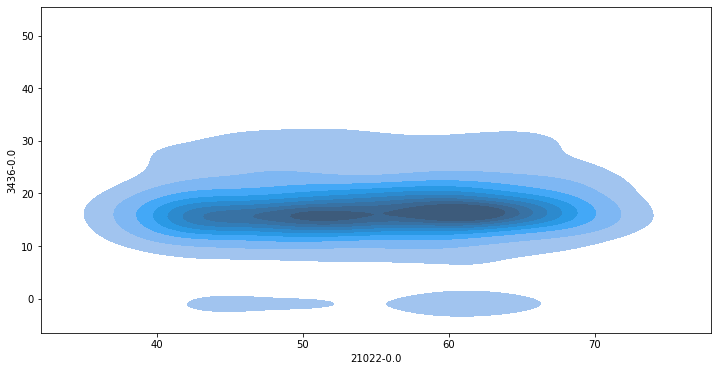

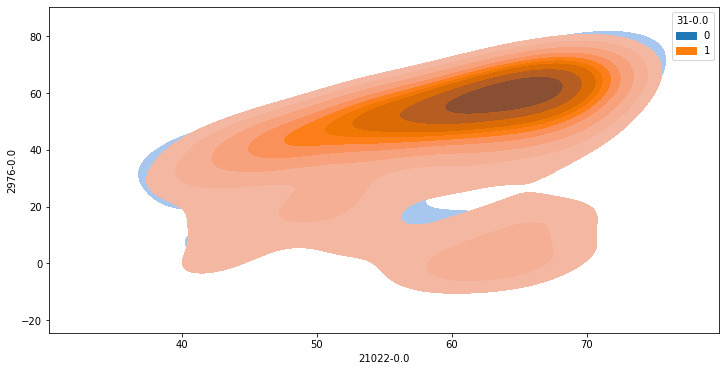

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=ukbb_data, y="3436-0.0", x="21022-0.0",  ax=ax, fill=True)
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=ukbb_data, y="2976-0.0", x="21022-0.0", hue="31-0.0", ax=ax, fill=True)

<AxesSubplot:xlabel='3436-0.0', ylabel='Count'>

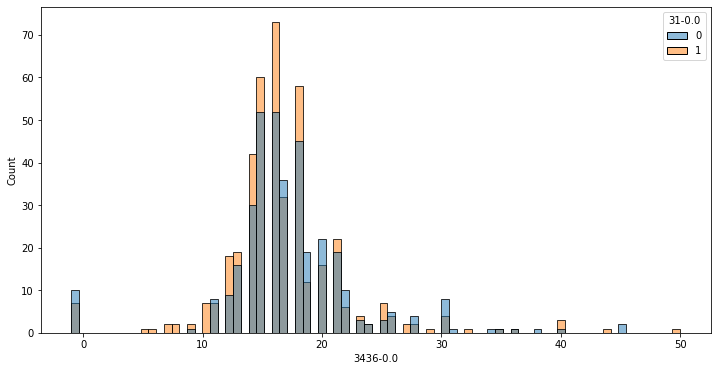

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=ukbb_data, x="3436-0.0", hue="31-0.0",  ax=ax)
# ax.set_xlim(-3, 5)

<AxesSubplot:xlabel='21022-0.0', ylabel='Count'>

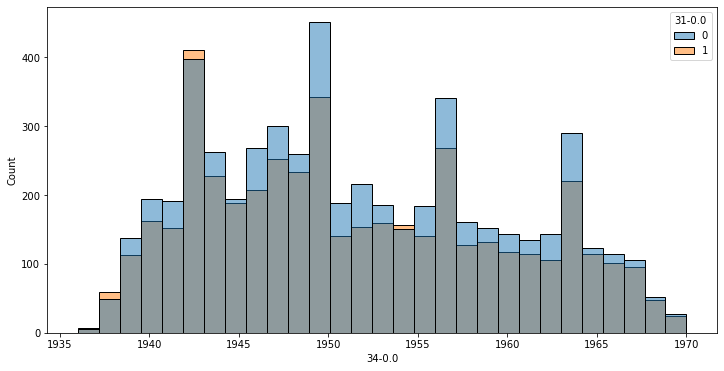

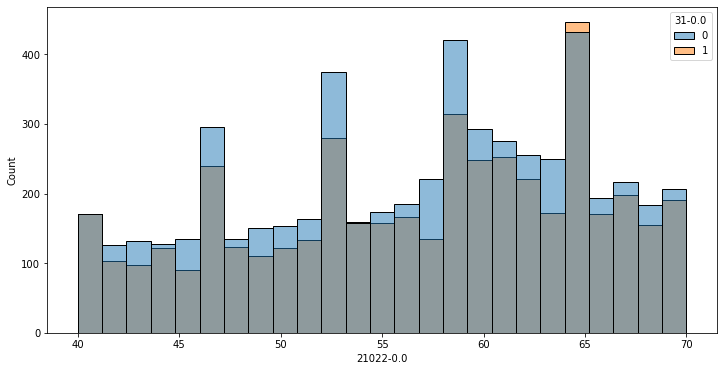

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=ukbb_data, x="34-0.0", hue="31-0.0",  ax=ax)
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=ukbb_data, x="21022-0.0", hue="31-0.0",  ax=ax)